# Lab 3

Mitch Morrison, Kyle Kolodziej, Sam Yassien, Brian Pattison

<h2>Business Understanding</h2>

Our dataset on video game releases from kaggle (link) contains data about its critic and user scores, the platform it is being released on, the developer and publisher of the game, and their sales in different reigons worldwide. For our classification task, we plan on using our dataset to predict game sales (in units, not dollars) into multiple different ranges. Since the range at which sales for video game units vary so largely, we chose to separate our classification groups in a way that allowed us to best balance the amount of video games in each category. See the visualizations below for a better explanation of why we needed to cut our sales categories this way.

We intend on using this data to forecast unit sales of video games based on the attributes listed above. This does not require real-time forecasting because in order to have a proper forecasting model the user will need to collect user and critic scores as well as basic information about the game.
 

<h2>Data Preparation</h2>

In [344]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [345]:
df = pd.read_csv('../../Video_game_dataset.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Our dataset has as significant amount of missing data in attributes that we want to use to predict video game sales worldwide. Rather than imputing this data, since the amount of missing data is so large it will serve is better to drop all instances with NA values.

In [347]:
# drop null value instances and reset index
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 853.2+ KB


We can see that by dropping all the rows with NA values, we now have only around 40% of our initial data. This is still greater than the 1000 instances needed.

In [348]:
# adjust types to properly fit data
df['User_Score'] = df['User_Score'].astype(np.float)
df['Year_of_Release'] = df['Year_of_Release'].astype(np.int)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 853.2+ KB


In [350]:
# taking a look at our cleaned data
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [351]:
len(df['Name'].unique())

4377

Since there are only 4377 unique game names, this implies that some games exist on multiple consoles or the same game is being released on the same console in different years.

<h3>Taking a look at how we will create classification categories</h3>

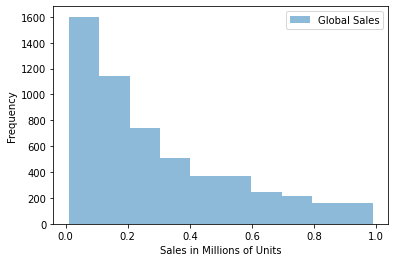

In [352]:
dfLowSales = df[df['Global_Sales'] < 1]
dfLowSales.Global_Sales.plot(kind='hist', alpha=0.5, label="Global Sales")
plt.legend()
plt.xlabel("Sales in Millions of Units")
# plt.yscale("log")
plt.show()

In [353]:
len(df[df['Global_Sales'] < 1]) / len(df)

0.8076190476190476

This plot indicates that nearly 4 out of 5 video games in our dataset reach less than 1 million unit sales.

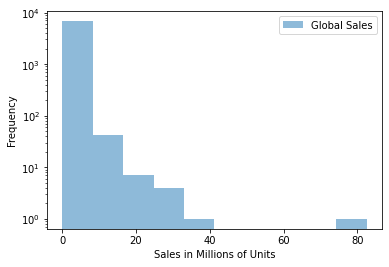

In [354]:
df.Global_Sales.plot(kind='hist', alpha=0.5, label="Global Sales")
plt.legend()
plt.yscale("log")
plt.xlabel("Sales in Millions of Units")
plt.show()

We can see that only a handful of games reach above a few million unit sales. Note the y-axis is a log scale, indicating almost all samples fall in the first block of the histogram as we mentioned before. We will split our global sales data into 4 different categories (4 classification possibilities), attempting to see similar frequency of data in our low and medium_low unit sales categories. 

<h3>Cutting our data for our target classification attribute</h3>

In [355]:
bins = [0,0.2,.5,1,1e5]
df['Global_Sales_Categories'] = pd.cut(df['Global_Sales'], 
                                           bins=bins, 
                                           labels=range(4)) # this creates a new variable

[Text(0, 0, 'Low'),
 Text(1, 0, 'Medium_Low'),
 Text(2, 0, 'Medium_High'),
 Text(3, 0, 'High')]

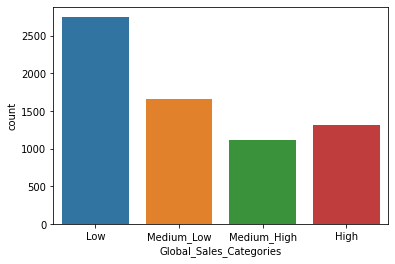

In [356]:
xticks=['Low','Medium_Low','Medium_High','High']
ax = sns.countplot(x="Global_Sales_Categories",data=df)
ax.set_xticklabels(xticks)


The histogram above indicates the amount of games that fall into each respective sales categories. We can see that both low and medium_low sales have ~2500 instances in each category. Now that we have cut our Global_Sales attribute into 4 different fields, we can encode our data to represent this. The groupby feature in pandas allows us the see the count of how many games fall into each category.

In [357]:
df.groupby('Global_Sales_Categories').count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Global_Sales_Categories,,,,,,,,,,,,,,,,
0,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
1,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
2,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114
3,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307


In [358]:
from sklearn import preprocessing

categorical = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
numData = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

numerical = pd.DataFrame()
le = preprocessing.LabelEncoder()

merged = []

for col in categorical:
    name = col + '_encoded'
    numerical[name] = le.fit_transform(df[col])
    merged.append(name)
    
for col in numData:
    numerical[col] = df[col]
    merged.append(col)

numerical.head()

,Platform_encoded,Genre_encoded,Publisher_encoded,Developer_encoded,Rating_encoded,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
0,12,10,160,771,1,2006,76.0,51.0,8.0,322.0
1,12,6,160,771,1,2008,82.0,73.0,8.3,709.0
2,12,10,160,771,1,2009,80.0,73.0,8.0,192.0
3,2,4,160,771,1,2006,89.0,65.0,8.5,431.0
4,12,3,160,771,1,2006,58.0,41.0,6.6,129.0


<h3>Test Train Split</h3>

In [359]:
from sklearn.model_selection import train_test_split

# X = df[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']].values
# y = df['Global_Sales_Categories'].values

X = numerical[merged].values
y = df['Global_Sales_Categories'].values

trainX, testX, trainY, testY = train_test_split(X, y, test_size=.3)

print('X train shape:',trainX.shape)
print('X test shape:',testX.shape)
print('Y train shape:',trainY.shape)
print('Y test shape:',testY.shape)

X train shape: (4777, 10)
X test shape: (2048, 10)
Y train shape: (4777,)
Y test shape: (2048,)


Splitting our dataset 80/20 does work. If we had a significant amount of more instances (say 2 million for example) we would not require such a high test train split ratio. With many instances, you can reduce the size of our testing set to a reasonable amount. With a dataset of 2 million instances, a testing set of 200,000 would likely suffice (90/10).

We need to say why 80/20 is better than some other ratio.

<h2>One vs All</h2>

In [360]:
# inherit from base class
from scipy.special import expit

class BinaryLogisticRegression():
    #private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
    
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+expit(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
            

In [361]:
params = dict(eta=0.01,
              iterations=500)

blr = BinaryLogisticRegression(**params)
print(blr)

Untrained Binary Logistic Regression Object


<h3>Making our classification Binary</h3>

In [362]:
blr.fit(trainX,trainY)
print(blr)

Binary Logistic Regression Object with coefficients:
[[7.45430884e-01]
 [7.92274161e+00]
 [4.25603028e+00]
 [1.03426300e+02]
 [5.96596559e+02]
 [1.78796106e+00]
 [1.49642755e+03]
 [8.40344051e+01]
 [6.85538741e+01]
 [6.88500642e+00]
 [8.44243906e+02]]


In [407]:
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        #print("in vect log reg")
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

In [398]:
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        print('in logistic regression fit')
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,
                                                 self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row


In [399]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression(0.1,1500)
print(lr)

lr.fit(trainX, trainY)
print(lr)

yhat = lr.predict(testX)

print(np.unique(yhat))

print('Accuracy of: ',accuracy_score(testY,yhat))

Untrained MultiClass Logistic Regression Object
in logistic regression fit
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log r

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect log reg
in vect 

In [408]:
class RegularizedBinaryLogisticRegression(VectorBinaryLogisticRegression):
    # extend init functions
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        #print("in reg bin log reg")
        
        # add in regularization (to all except bias term)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient

In [409]:
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def fit(self,X,y):
#         print('in reg log fit')
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers

        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [410]:
from sklearn.metrics import accuracy_score

rlr = RegularizedLogisticRegression(eta=0.1,
                                           iterations=2500, C=0.0007)
print(rlr)

rlr.fit(trainX, trainY)
print(rlr)

yhat = rlr.predict(testX)

print(np.unique(yhat))

print('Accuracy of: ',accuracy_score(testY,yhat))

Untrained MultiClass Logistic Regression Object
MultiClass Logistic Regression Object with coefficients:
[[-4.47321969e-03 -2.77507490e+01 -6.00920297e+00  4.65149068e+00
  -6.45638349e+00  1.86880265e+01  1.56603750e+01 -3.07525420e+02
  -4.08709074e+02 -1.64744848e+01 -4.66680421e+01]
 [-5.68617745e-02  7.47127270e+00 -6.43714336e+00  1.75065655e+01
  -1.10107923e+02 -1.72664348e+00 -9.58888727e+01 -2.95969627e+01
  -2.42474878e+01 -2.81957296e+00 -6.15725474e+01]
 [-8.11753351e-02  1.06875931e+01  1.07154997e+01 -1.99816980e+01
  -4.26924584e+01 -4.59202696e-01 -1.35332839e+02  1.15374703e+02
   1.33459641e+02  6.75696494e+00 -1.22475903e+01]
 [-3.97559378e-02  8.72213399e+00 -8.55874503e-02 -1.31970220e+01
  -2.24888415e+01 -1.75839372e+01 -9.24860594e+01  2.04615962e+02
   2.81732525e+02  1.11573047e+01  5.86566036e+01]]
[0 3]
Accuracy of:  0.40625


In [411]:
class StochasticLogisticRegression(RegularizedLogisticRegression):
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        print("in stoch")
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    
slr = StochasticLogisticRegression(eta=0.05, iterations=2000, C=0.0001) # take a lot more steps!!

slr.fit(trainX,trainY)

yhat = slr.predict(testX)
print(slr)
print('Accuracy of: ',accuracy_score(testY,yhat))
print(np.unique(yhat))

MultiClass Logistic Regression Object with coefficients:
[[-1.61468704e-04 -1.31725272e+01 -2.92869338e+00  2.18660980e+00
  -1.40689923e+00  8.76021445e+00  8.97462065e+00 -1.46658840e+02
  -1.95093268e+02 -7.90029816e+00 -2.02154634e+01]
 [-2.57868595e-02  3.50018919e+00 -3.00675661e+00  8.96610454e+00
  -5.51169718e+01 -8.23086960e-01 -4.79281026e+01 -1.40017115e+01
  -1.15791377e+01 -1.33609650e+00 -3.13553475e+01]
 [-1.47032475e-03  5.39195212e+00  5.25693566e+00 -6.70021849e+00
  -4.48479420e-01 -8.28500094e-02 -1.49844793e+00  5.82893097e+01
   6.63866020e+01  3.52371148e+00 -8.02220744e-01]
 [-2.73692513e-02  4.14852486e+00  1.58846998e-02 -8.14762703e+00
  -1.72279556e+01 -8.27780822e+00 -6.84082103e+01  9.77019535e+01
   1.35403550e+02  5.33261116e+00  3.05620068e+01]]
Accuracy of:  0.38525390625
[0 2 3]


In [412]:
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(RegularizedLogisticRegression):
    # just overwrite gradient function
    def __init__(self,C=0.0, regularization= "None", **kwds):        
        # need to add to the original initializer 
        self.C = C
        self.regularization = regularization
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def _get_gradient(self,X,y):
        print("here")
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        print("here")
        print(self.regularization)
        if self.regularization == "L1":
            gradient[1:] += np.abs(self.w_[1:]) * 0.1
        elif self.regularization == "L2":
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.regularization == "both":
            pass
        else:
            pass
        return pinv(hessian) @ gradient
        
        
        


hlr = HessianBinaryLogisticRegression(eta=1.0,
                                      iterations=1500,
                                      C=0.001) # note that we need only a few iterations here

hlr.fit(X,y)
yhat = hlr.predict(X)
print(hlr)
print('Accuracy of: ',accuracy_score(y,yhat))
print(np.unique(yhat))

MultiClass Logistic Regression Object with coefficients:
[[-3.74465694e-01 -2.13618695e+02 -2.07595270e+00  5.04668588e-01
  -2.96983137e+02  1.33443439e+02 -6.34191844e+02 -2.13374083e+03
  -2.96142204e+03 -1.19770047e+02 -5.72653680e+02]
 [-5.09163423e-01  4.47891757e+01 -7.59297807e+01  2.73069936e+02
  -1.11065632e+03 -5.76021178e+00 -9.77395417e+02 -2.71011033e+02
  -6.27140080e+01 -1.53227287e+01 -5.11504232e+02]
 [-4.36005155e-01  8.06103825e+01  6.26647621e+01 -9.15563535e+01
  -2.58124446e+02 -2.63483514e+01 -8.52149174e+02  7.04538725e+02
   8.54460528e+02  3.66068800e+01 -8.10270801e+01]
 [-1.12704884e-02  8.07599566e+01 -4.55310058e+00 -1.60053396e+02
   6.83644111e+01 -1.04494675e+02 -2.05725090e+02  1.61012474e+03
   2.18694315e+03  8.85983002e+01  7.20969287e+02]]
Accuracy of:  0.44761904761904764
[0 3]


In [413]:
def CustomRegress(etaVal, iters, cVal, lrType="None", regularizationType="None"):
    # just overwrite gradient function
    if lrType == "newton":
        return HessianBinaryLogisticRegression(eta=etaVal, iterations=iters, C=cVal, regularization=regularizationType)
    else:
        return StochasticLogisticRegression(eta=etaVal,
                                              iterations=iters,
                                              C=cVal)  

clr = CustomRegress(1.0,2000,0.001,"newton", "L2") # note that we need only a few iterations here

clr.fit(trainX,trainY)
yhat = clr.predict(testX)
print(hlr)
print('Accuracy of: ',accuracy_score(testY,yhat))
print(np.unique(yhat))

MultiClass Logistic Regression Object with coefficients:
[[-3.74465694e-01 -2.13618695e+02 -2.07595270e+00  5.04668588e-01
  -2.96983137e+02  1.33443439e+02 -6.34191844e+02 -2.13374083e+03
  -2.96142204e+03 -1.19770047e+02 -5.72653680e+02]
 [-5.09163423e-01  4.47891757e+01 -7.59297807e+01  2.73069936e+02
  -1.11065632e+03 -5.76021178e+00 -9.77395417e+02 -2.71011033e+02
  -6.27140080e+01 -1.53227287e+01 -5.11504232e+02]
 [-4.36005155e-01  8.06103825e+01  6.26647621e+01 -9.15563535e+01
  -2.58124446e+02 -2.63483514e+01 -8.52149174e+02  7.04538725e+02
   8.54460528e+02  3.66068800e+01 -8.10270801e+01]
 [-1.12704884e-02  8.07599566e+01 -4.55310058e+00 -1.60053396e+02
   6.83644111e+01 -1.04494675e+02 -2.05725090e+02  1.61012474e+03
   2.18694315e+03  8.85983002e+01  7.20969287e+02]]
Accuracy of:  0.41650390625
[0 3]


In [414]:
clr = CustomRegress(1.0,2000,0.001,"stoch") # note that we need only a few iterations here

clr.fit(trainX,trainY)
yhat = clr.predict(testX)
print(hlr)
print('Accuracy of: ',accuracy_score(testY,yhat))
print(np.unique(yhat))

MultiClass Logistic Regression Object with coefficients:
[[-3.74465694e-01 -2.13618695e+02 -2.07595270e+00  5.04668588e-01
  -2.96983137e+02  1.33443439e+02 -6.34191844e+02 -2.13374083e+03
  -2.96142204e+03 -1.19770047e+02 -5.72653680e+02]
 [-5.09163423e-01  4.47891757e+01 -7.59297807e+01  2.73069936e+02
  -1.11065632e+03 -5.76021178e+00 -9.77395417e+02 -2.71011033e+02
  -6.27140080e+01 -1.53227287e+01 -5.11504232e+02]
 [-4.36005155e-01  8.06103825e+01  6.26647621e+01 -9.15563535e+01
  -2.58124446e+02 -2.63483514e+01 -8.52149174e+02  7.04538725e+02
   8.54460528e+02  3.66068800e+01 -8.10270801e+01]
 [-1.12704884e-02  8.07599566e+01 -4.55310058e+00 -1.60053396e+02
   6.83644111e+01 -1.04494675e+02 -2.05725090e+02  1.61012474e+03
   2.18694315e+03  8.85983002e+01  7.20969287e+02]]
Accuracy of:  0.40625
[0 3]


In [425]:

etas = [0.001,0.01,0.1,1,10]
iters = [50,75,150,200]
newtonAcc= []
stochAcc = []
for eta in etas :
    for val in iters :
        clr = CustomRegress(eta,val,0.001,"newton")
        clr.fit(trainX,trainY)
        yhat = clr.predict(testX)
        print('Newton: eta =', eta, 'iters = ', val, 'Accuracy of: ',accuracy_score(testY,yhat))
        newtonAcc.append(accuracy_score(testY,yhat))
        clr = CustomRegress(eta,val,0.001)
        clr.fit(trainX,trainY)
        yhat = clr.predict(testX)
        print('Stoch: eta =', eta, 'iters = ', val, 'Accuracy of: ',accuracy_score(testY,yhat))
        stochAcc.append(accuracy_score(testY,yhat))
        
# for eta in etas :
#     for val in iters :
#         clr = CustomRegress(eta,val,0.001)
#         clr.fit(trainX,trainY)
#         yhat = clr.predict(testX)
#         print('eta =', eta, 'iters = ', val, 'Accuracy of: ',accuracy_score(testY,yhat))

Newton: eta = 0.001 iters =  50 Accuracy of:  0.18603515625
Stoch: eta = 0.001 iters =  50 Accuracy of:  0.3837890625
Newton: eta = 0.001 iters =  75 Accuracy of:  0.41552734375
Stoch: eta = 0.001 iters =  75 Accuracy of:  0.2802734375
Newton: eta = 0.001 iters =  150 Accuracy of:  0.41455078125
Stoch: eta = 0.001 iters =  150 Accuracy of:  0.189453125
Newton: eta = 0.001 iters =  200 Accuracy of:  0.41455078125
Stoch: eta = 0.001 iters =  200 Accuracy of:  0.43701171875
Newton: eta = 0.01 iters =  50 Accuracy of:  0.40380859375
Stoch: eta = 0.01 iters =  50 Accuracy of:  0.40576171875
Newton: eta = 0.01 iters =  75 Accuracy of:  0.27294921875
Stoch: eta = 0.01 iters =  75 Accuracy of:  0.2626953125
Newton: eta = 0.01 iters =  150 Accuracy of:  0.40380859375
Stoch: eta = 0.01 iters =  150 Accuracy of:  0.44287109375
Newton: eta = 0.01 iters =  200 Accuracy of:  0.16162109375
Stoch: eta = 0.01 iters =  200 Accuracy of:  0.16162109375
Newton: eta = 0.1 iters =  50 Accuracy of:  0.4140625

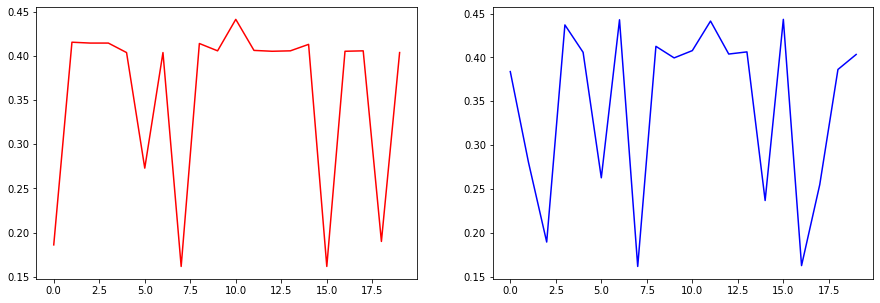

In [427]:
y = list(range(0,20))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(y,newtonAcc,'r-')
ax2.plot(y,stochAcc, 'b-')